### Task 104: Add graph of token balances for each holder

In [1]:
import os
import copy
import numpy as np
import time
import matplotlib.pyplot as plt
cwd =  os.getcwd().replace("notebooks/test","")
os.chdir(cwd)

from python.dev.event import Deposit
from python.dev.event import Withdraw
from python.dev.cpt import Liquidity
from python.dev.token import RebaseToken
from python.dev.math.model import TimeDeltaModel
from python.dev.math.model import TokenDeltaModel

In [2]:
N_TOKENS = 4
N_ADDR = 5

In [3]:
APY = 0.1
TYPE_DEPOSIT_TOKEN = 'DEPOSIT'
TOKEN = N_TOKENS * [None]
ADDR = N_TOKENS*N_ADDR*[None]
deposit = 10000 

for k in range(N_TOKENS):
    TOKEN[k] = RebaseToken(TYPE_DEPOSIT_TOKEN)
    for j in range(N_ADDR):
        ADDR[j + N_ADDR*k] = TOKEN[k].mint(deposit, APY)   

In [4]:
percent = 0.05
N = 100

for n in range(N):
        
    for k in range(N_TOKENS):
        for j in range(N_ADDR):    
            token_delta = TokenDeltaModel(1,100).apply() 
            time_delta = TimeDeltaModel().apply() 
            TOKEN[k].add_event(Deposit(APY, token_delta, time_delta, ADDR[j + N_ADDR*k]))
        TOKEN[k].update_rebases(APY, ADDR[(N_ADDR*k):N_ADDR*(k+1)])
    
    if (n % int(N/(100*percent)) == 0):
        out_str = '[SIM {}]'.format(n)
        for k in range(N_TOKENS):
            amt = TOKEN[k].get_balance_deposits()
            out_str = out_str+' T{}: {:.2f}'.format(k+1,amt)
            
        print(out_str) 
        

[SIM 0] T1: 50633.29 T2: 50244.19 T3: 50726.84 T4: 50822.90
[SIM 20] T1: 61086.14 T2: 61742.47 T3: 63517.55 T4: 60504.21
[SIM 40] T1: 70740.66 T2: 72086.51 T3: 73017.51 T4: 71694.05
[SIM 60] T1: 82133.00 T2: 83051.40 T3: 85296.65 T4: 83281.40
[SIM 80] T1: 93566.58 T2: 95762.48 T3: 95512.42 T4: 93944.46


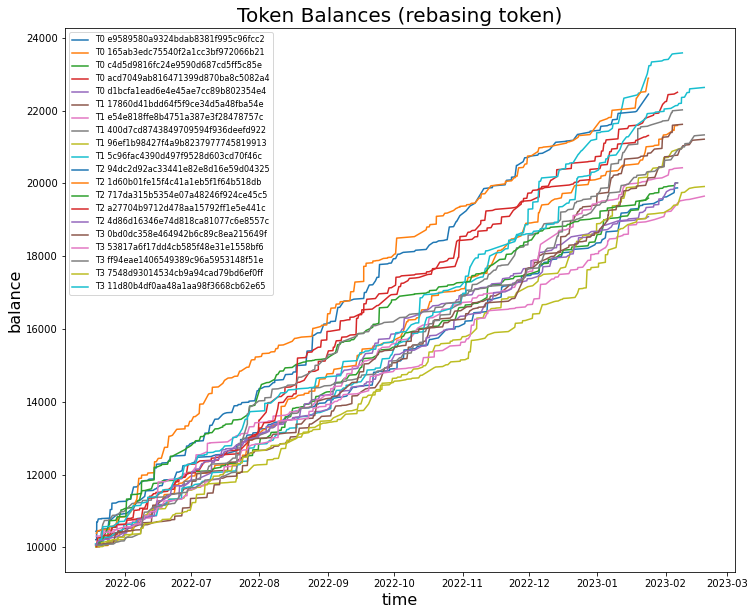

In [5]:
T_states = N_TOKENS*N_ADDR*[None]
final_balances = N_TOKENS*N_ADDR*[0]

fig, (T_ax) = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(12, 10))

for k in range(N_TOKENS):
    for j in range(N_ADDR):
        m = j + N_ADDR*k
        T_states[m] = TOKEN[k].get_state_series(ADDR[m])
        tSamp = T_states[m].get_tstamp() 
        balance = T_states[m].get_balance() 
        final_balances[m] = balance[-1]
        T_ax.plot(tSamp, balance, label='T{} {}'.format(k,ADDR[m])) 

T_ax.set_title("Token Balances (rebasing token)", fontsize=20)
T_ax.set_ylabel("balance", fontsize=16)
T_ax.set_xlabel('time', fontsize=16)
T_ax.legend(fontsize=8)
        

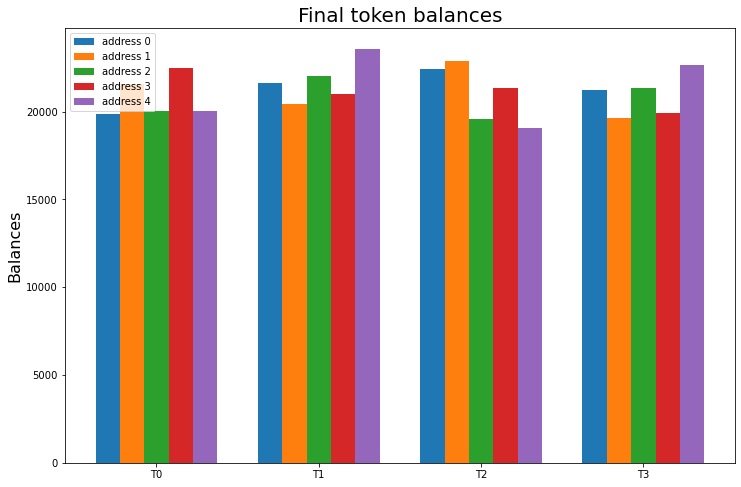

In [6]:
bar_width = 0.15
x = np.arange(N_TOKENS)
token_names = ['T'+str(k) for k in range(N_TOKENS)]

fig, (ax1) = plt.subplots(nrows=1, sharex=True, sharey=False, figsize=(12, 8))
ax1.set_title("Final token balances", fontsize=20)
ax1.set_ylabel('Balances', fontsize=16)

for k in range(N_ADDR):
    ax1.bar(x + k*bar_width, final_balances[k:20+k:5], width=bar_width, label='address {}'.format(k))

ax1.set_xticks(x + 0.3)
ax1.set_xticklabels(token_names)
plt.legend()
plt.show()
